In [1]:
from pathlib import Path
import pandas as pd
from multiprocessing import Pool

def count_rows(item, path):
    # Each process reads only the required portion of the file
    reviews = pd.read_csv(path/'steam_reviews.csv')
    count = len(reviews[reviews['app_id'] == item])
    return item, count


In [2]:

path = Path('../data')
games = pd.read_csv(path/'steam_games.csv')

unique_ids = games['AppID'].unique()
print(f'Unique Game IDs: {len(unique_ids)}')

Unique Game IDs: 85103


In [3]:
reviews = pd.read_csv(path/'steam_reviews.csv')
unique_ids_reviews = reviews['app_id'].unique()
print(f'Unique Game IDs in reviews: {len(unique_ids_reviews)}')

Unique Game IDs in reviews: 9972


In [4]:
unique_ids

array([  20200,  655370, 1732930, ..., 2743220, 2293130, 2738840],
      dtype=int64)

In [11]:
from tqdm import tqdm


results = {}
for id in tqdm(unique_ids):
    this_count = len(reviews[reviews['app_id'] == id])
    if this_count > 0:
        results[id] = this_count

100%|██████████| 85103/85103 [11:01<00:00, 128.63it/s] 


<AxesSubplot:>

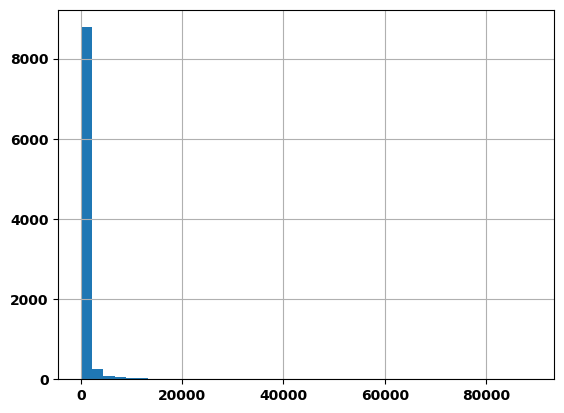

In [16]:
# save results in dataframe and plot histogram
results_df = pd.DataFrame(results.items(), columns=['AppID', 'count'])
#results_df.to_csv('results.csv', index=False)
# plot histogram
results_df['count'].hist(bins=40)

In [13]:
results_df

,AppID,count
0,20200,9
1,320150,40
2,485000,90
3,22670,110
4,346560,308
...,...,...
9313,347080,4
9314,100980,29
9315,424310,1
9316,353130,810


In [20]:
results_df['count'].describe()

count     9318.000000
mean       659.995815
std       3188.239968
min          1.000000
25%         18.000000
50%         58.000000
75%        243.000000
max      88973.000000
Name: count, dtype: float64

In [18]:
results_df['count'].sort_values()

5482        1
3055        1
4171        1
8871        1
3082        1
        ...  
2597    73541
5176    77037
6822    84828
6336    88850
5805    88973
Name: count, Length: 9318, dtype: int64

In [19]:
results_df['count'].sum()

6149841